In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pca import PCA
from sklearn.decomposition import PCA as sklearnPCA
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error


In [2]:
# Paramètres de la matrice
n = 100  # Nombre d'individus
p = 5    # Nombre de variables

# Création d'une matrice aléatoire
np.random.seed(0)  # Pour la reproductibilité
X = np.random.randn(n, p)

# Conversion en DataFrame pour une meilleure manipulation
df = pd.DataFrame(X, columns=[f'Variable {i+1}' for i in range(p)])


Visualisation des premières lignes de la matrice X :
   Variable 1  Variable 2  Variable 3  Variable 4  Variable 5
0    1.764052    0.400157    0.978738    2.240893    1.867558
1   -0.977278    0.950088   -0.151357   -0.103219    0.410599
2    0.144044    1.454274    0.761038    0.121675    0.443863
3    0.333674    1.494079   -0.205158    0.313068   -0.854096
4   -2.552990    0.653619    0.864436   -0.742165    2.269755

Indicateurs statistiques pour chaque variable :
       Variable 1  Variable 2  Variable 3  Variable 4  Variable 5
count  100.000000  100.000000  100.000000  100.000000  100.000000
mean    -0.102957   -0.016874   -0.058413   -0.094274    0.145745
std      1.013613    0.961449    1.006064    1.039578    0.972417
min     -2.655619   -2.772593   -2.739677   -2.288620   -2.659172
25%     -0.730076   -0.805805   -0.690175   -0.752281   -0.398115
50%     -0.124405    0.007135   -0.117134   -0.220185    0.054055
75%      0.677724    0.803853    0.768311    0.505741    0.64669

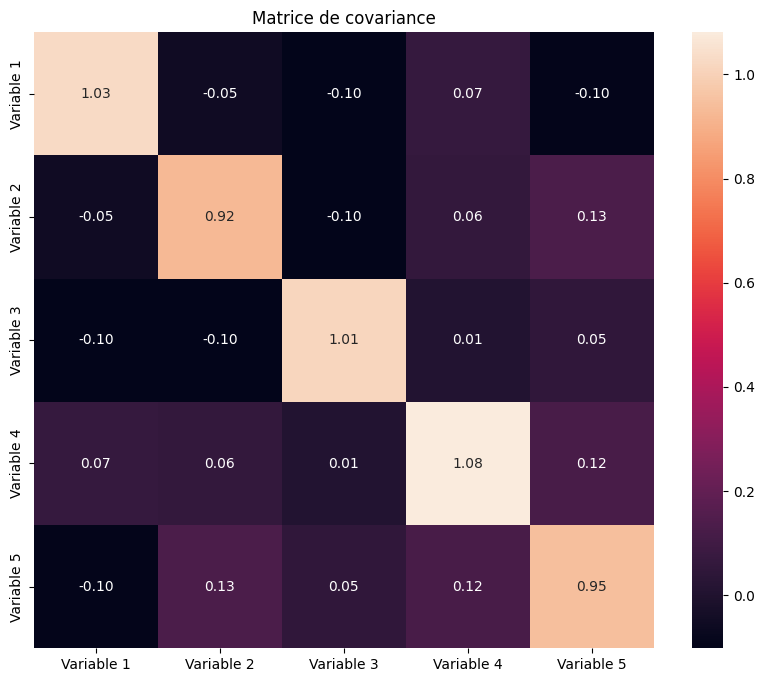

In [3]:
# Visualisation de la matrice
print("Visualisation des premières lignes de la matrice X :")
print(df.head())

# Calcul et affichage des indicateurs statistiques
print("\nIndicateurs statistiques pour chaque variable :")
print(df.describe())

# Calcul de la variance pour chaque variable
variance = df.var()
print("\nVariance pour chaque variable :")
print(variance)

# Calcul de l'écart-type pour chaque variable
ecart_type = df.std()
print("\nÉcart-type pour chaque variable :")
print(ecart_type)

# Calcul de la matrice de covariance
covariance = df.cov()
print("\nMatrice de covariance :")
print(covariance)

# Affichage de la matrice de covariance sous forme graphique
plt.figure(figsize=(10, 8))
sns.heatmap(covariance, annot=True, fmt=".2f")
plt.title("Matrice de covariance")
plt.show()



In [4]:
# Calcul de la moyenne pour chaque variable (colonne)
mean_X = np.mean(X, axis=0)

# Centrage des données
X_centered = X - mean_X

# Applying PCA to the dataset
pca = PCA()
pca.fit(X_centered)

# Extracting eigenvalues and eigenvectors
eigenvalues_centered = pca.eigenvalues
eigenvectors = pca.eigenvectors

eigenvalues_centered, eigenvectors


(array([1.19890095, 1.14790963, 1.03619762, 0.81046296, 0.74690192]),
 array([[ 0.24466321, -0.6922949 ,  0.3108332 , -0.60200122, -0.04295265],
        [-0.41943705, -0.11978841, -0.52219593, -0.25327285, -0.68766822],
        [-0.08097075,  0.57554894,  0.62150877, -0.34565713, -0.39551885],
        [-0.63040665, -0.39485936,  0.48404277,  0.4536074 , -0.08134173],
        [-0.60020303,  0.138593  , -0.10061602, -0.49820565,  0.60184371]]))

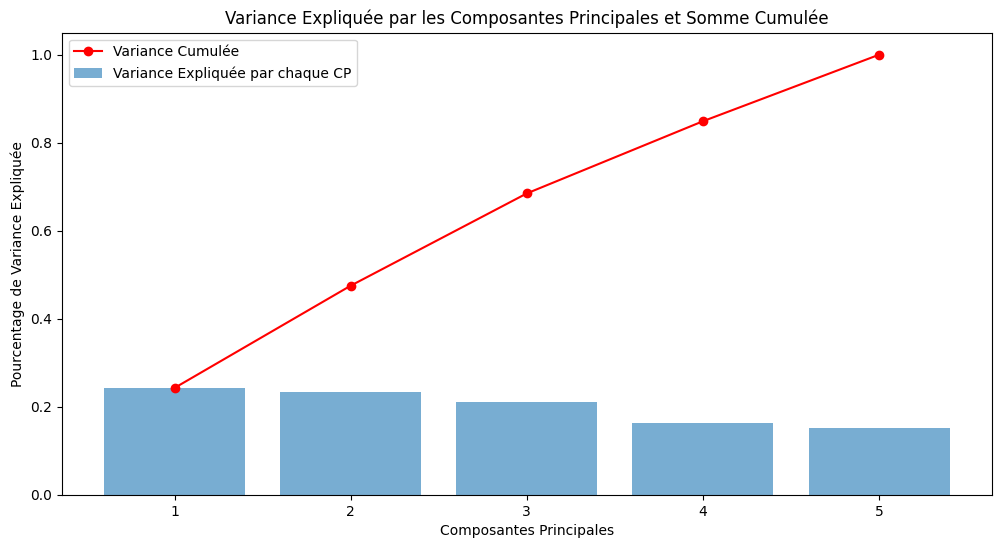

In [5]:
# Calcul de la part de la variance expliquée par chaque composante principale
variance_explained = eigenvalues_centered / eigenvalues_centered.sum()
cumulative_variance = np.cumsum(variance_explained)

# Création des indices pour les composantes principales
components = np.arange(1, p + 1)

# Création du graphique
plt.figure(figsize=(12, 6))

# Barres pour la variance expliquée par chaque composante
plt.bar(components, variance_explained, alpha=0.6, label='Variance Expliquée par chaque CP')

# Ligne pour la variance cumulée
plt.plot(components, cumulative_variance, marker='o', color='red', label='Variance Cumulée')

# Ajout de détails au graphique
plt.xlabel('Composantes Principales')
plt.ylabel('Pourcentage de Variance Expliquée')
plt.title('Variance Expliquée par les Composantes Principales et Somme Cumulée')
plt.xticks(components)
plt.legend(loc='best')

# Affichage du graphique
plt.show()


In [6]:
# Application des différentes méthodes pour déterminer le nombre de composantes à retenir

# Règle de Kaiser (Valeurs propres > 1)
kaiser_rule = np.sum(eigenvalues_centered > 1)

# Pourcentage de variance expliquée (80%, 90%, 95%)
thresholds = [0.8, 0.9, 0.95]
components_for_variance = [np.argmax(cumulative_variance >= t) + 1 for t in thresholds]

# Test de Jolliffe (Valeurs propr7)
jolliffe_rule = np.sum(eigenvalues_centered > 0.7)

# Analyse parallèle (Comparer avec valeurs propres de données aléatoires)
# Génération de données aléatoires et applicaties > 0.on de la PCA
random_data = np.random.randn(n, p)
pca.fit(random_data)
random_eigenvalues = pca.eigenvalues

# Comparaison des valeurs propres avec celles des données aléatoires
parallel_analysis = np.sum(eigenvalues_centered > random_eigenvalues)

kaiser_rule, components_for_variance, jolliffe_rule, parallel_analysis




(3, [4, 5, 5], 5, 3)

Règle de Kaiser : 3 composantes sont retenues (valeurs propres > 1).

Pourcentage de Variance Expliquée :

Pour atteindre 80% de la variance cumulée, 4 composantes sont nécessaires.
Pour atteindre 90% de la variance cumulée, 5 composantes sont nécessaires.
Pour atteindre 95% de la variance cumulée, 5 composantes sont également nécessaires.
Test de Jolliffe : 5 composantes sont retenues (valeurs propres > 0.7).

Analyse Parallèle : Comparaison avec les valeurs propres de données aléatoires suggère de retenir 3 composantes.

On décide donc de selctionner 3 composantes seulement.

In [7]:
# Sélection des 3 premiers vecteurs propres pour la transformation des données
eigenvectors_selected = eigenvectors[:, :3]

# Transformation des données centrées
X_pca = X_centered @ eigenvectors_selected

# Somme des carrés dans l'espace de données original
sum_squares_original = np.sum(X_centered**2, axis=1)

# Calcul de Qi,k pour chaque individu avec la PCA personnalisée
sum_squares_pca_custom = np.sum(X_pca**2, axis=1)
Qi_k_custom = sum_squares_pca_custom / sum_squares_original

# Affichage des premières valeurs de Qi,k pour vérification
Qi_k_custom[:10]  # Affichage des 10 premières valeurs de Qi,k pour un aperçu

array([0.85345327, 0.87805316, 0.29613795, 0.26797499, 0.95862317,
       0.77889506, 0.92695801, 0.0651625 , 0.14074721, 0.94219061])

In [8]:
# Calcul de gamma_ij pour chaque individu et chaque composante principale
gamma_ij = np.square(X_pca) / (n * eigenvalues_centered[:3])

# Affichage des premières valeurs de gamma_ij pour un aperçu (pour les 3 premières composantes et les 10 premiers individus)
gamma_ij[:10, :3]  # Affichage des contributions pour les 10 premiers individus sur les 3 premières composantes

array([[4.44177946e-02, 1.77886320e-02, 3.72343412e-02],
       [4.88511523e-03, 1.97548987e-03, 7.22848320e-03],
       [7.33939000e-03, 5.63939085e-05, 1.11779879e-04],
       [2.45966798e-04, 6.55051666e-03, 1.92593451e-03],
       [2.76829625e-02, 6.33737637e-02, 1.09550285e-02],
       [3.91547610e-02, 1.35881999e-03, 1.42665212e-04],
       [1.75400985e-02, 6.21848144e-06, 2.18610839e-02],
       [9.74509708e-05, 1.76685633e-03, 1.30219975e-04],
       [1.36971768e-03, 9.13556583e-03, 2.13610219e-03],
       [1.98293005e-02, 1.73563406e-02, 1.25946265e-03]])

In [9]:
# Application de la PCA de sklearn sur les données centrées
sklearn_pca = sklearnPCA(n_components=2)  # Focalisation sur les 2 premières composantes
sklearn_pca.fit(X_centered)

# Extraction des valeurs propres et des vecteurs propres de sklearn PCA
sklearn_eigenvalues = sklearn_pca.explained_variance_
sklearn_eigenvectors = sklearn_pca.components_

# Comparaison des résultats
# Valeurs propres (variance expliquée)
eigenvalues_comparison = np.column_stack((eigenvalues_centered[:2], sklearn_eigenvalues))

# Vecteurs propres (directions des axes)
# Normalisation des vecteurs propres pour la comparaison
eigenvectors_normalized = eigenvectors[:, :2] / np.linalg.norm(eigenvectors[:, :2], axis=0)
sklearn_eigenvectors_normalized = sklearn_eigenvectors / np.linalg.norm(sklearn_eigenvectors, axis=1)[:, np.newaxis]

eigenvectors_comparison = np.column_stack((eigenvectors_normalized.flatten(), sklearn_eigenvectors_normalized.flatten()))

eigenvalues_comparison, eigenvectors_comparison

(array([[1.19890095, 1.21101106],
        [1.14790963, 1.15950468]]),
 array([[ 0.24466321,  0.24466321],
        [-0.6922949 , -0.41943705],
        [-0.41943705, -0.08097075],
        [-0.11978841, -0.63040665],
        [-0.08097075, -0.60020303],
        [ 0.57554894,  0.6922949 ],
        [-0.63040665,  0.11978841],
        [-0.39485936, -0.57554894],
        [-0.60020303,  0.39485936],
        [ 0.138593  , -0.138593  ]]))

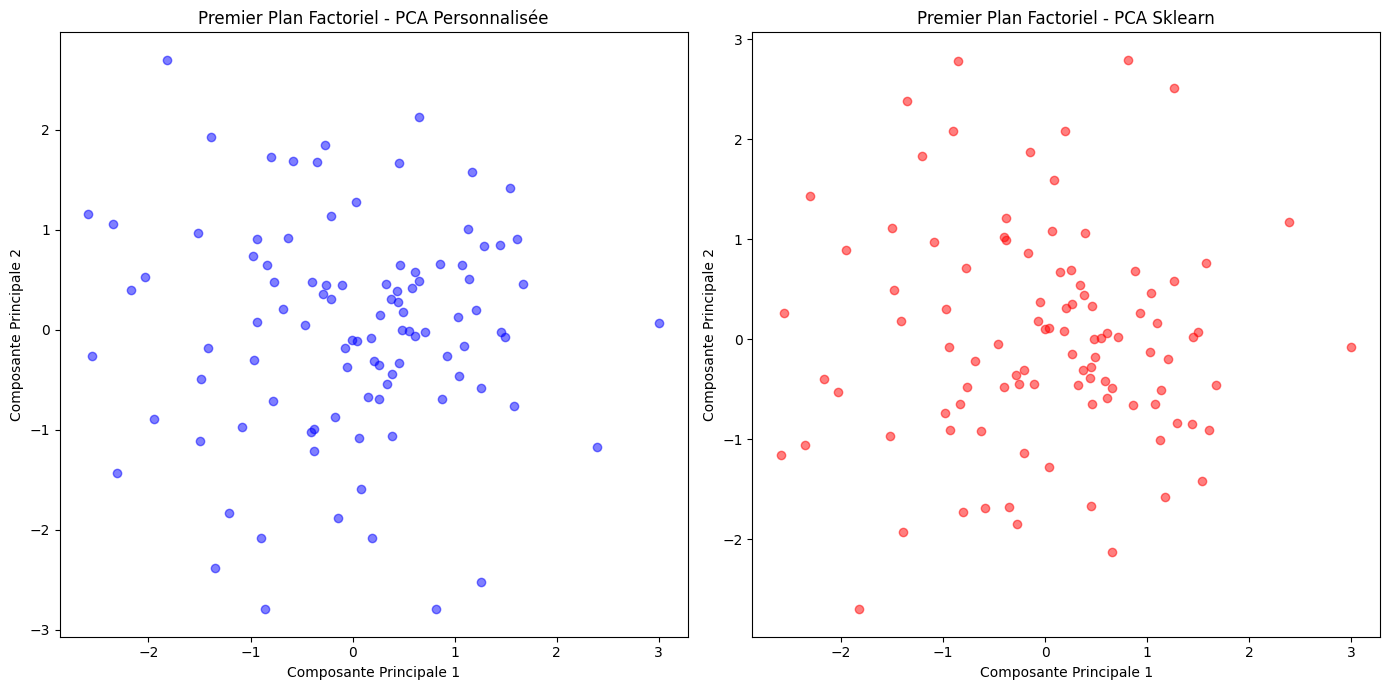

In [10]:
# Création des plots pour comparer les deux premières composantes principales des deux implémentations de PCA

# Transformation des données centrées avec les deux implémentations de PCA
X_pca_custom = X_centered @ eigenvectors[:, :2]
X_pca_sklearn = sklearn_pca.transform(X_centered)

# Création du graphique
plt.figure(figsize=(14, 7))

# Premier plan factoriel avec PCA personnalisée
plt.subplot(1, 2, 1)
plt.scatter(X_pca_custom[:, 0], X_pca_custom[:, 1], color='blue', alpha=0.5)
plt.title('Premier Plan Factoriel - PCA Personnalisée')
plt.xlabel('Composante Principale 1')
plt.ylabel('Composante Principale 2')

# Premier plan factoriel avec PCA sklearn
plt.subplot(1, 2, 2)
plt.scatter(X_pca_sklearn[:, 0], X_pca_sklearn[:, 1], color='red', alpha=0.5)
plt.title('Premier Plan Factoriel - PCA Sklearn')
plt.xlabel('Composante Principale 1')
plt.ylabel('Composante Principale 2')

plt.tight_layout()
plt.show()


On observe qu'a une symétrie prêt on a le meme graph


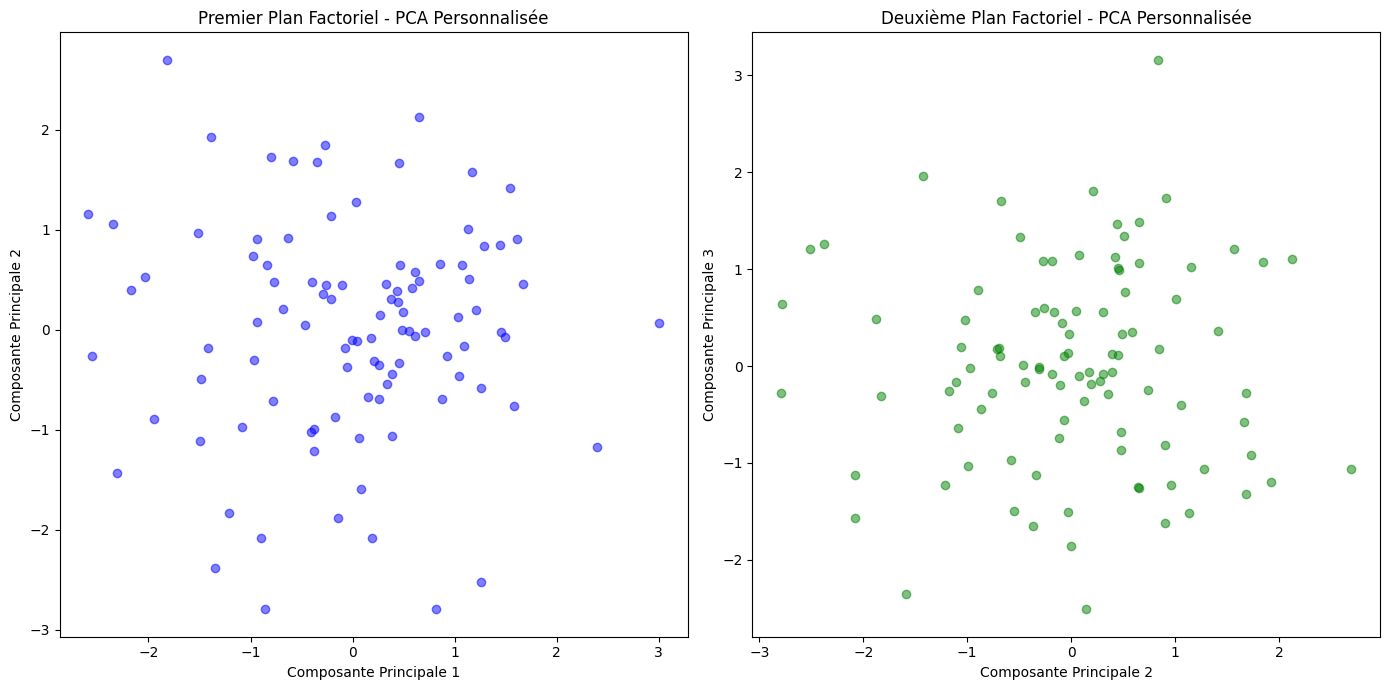

In [11]:
# Création de graphiques pour représenter les individus dans les sous-espaces formés par les premières et deuxièmes composantes principales (uniquement pour la PCA personnalisée)

# Premier plan factoriel (1ère et 2ème composantes)
plt.figure(figsize=(14, 7))

# Premier plan factoriel
plt.subplot(1, 2, 1)
plt.scatter(X_pca_custom[:, 0], X_pca_custom[:, 1], color='blue', alpha=0.5)
plt.title('Premier Plan Factoriel - PCA Personnalisée')
plt.xlabel('Composante Principale 1')
plt.ylabel('Composante Principale 2')

# Deuxième plan factoriel (2ème et 3ème composantes)
# Calcul des coordonnées pour la 3ème composante
X_pca_custom_3rd = X_centered @ eigenvectors[:, 2]

plt.subplot(1, 2, 2)
plt.scatter(X_pca_custom[:, 1], X_pca_custom_3rd, color='green', alpha=0.5)
plt.title('Deuxième Plan Factoriel - PCA Personnalisée')
plt.xlabel('Composante Principale 2')
plt.ylabel('Composante Principale 3')

plt.tight_layout()
plt.show()


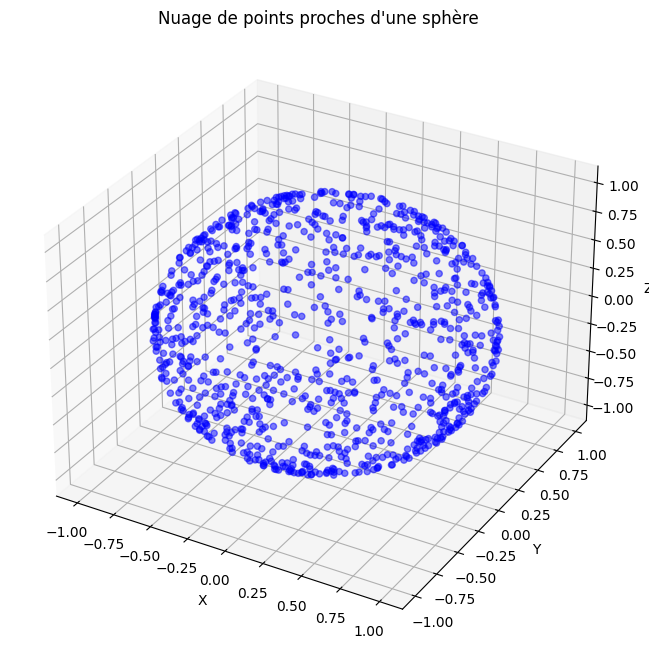

array([[ 0.490649  ,  0.78762736, -0.3727019 ],
       [ 0.32538168,  0.70863831,  0.6260659 ],
       [ 0.28500181, -0.95817442, -0.02599507],
       ...,
       [ 0.59620732,  0.06754053, -0.79998444],
       [ 0.2088323 , -0.26643618,  0.9409574 ],
       [-0.01722893,  0.88875938, -0.45805015]])

In [12]:
#nuage isotrope
# Taille de l'échantillon
n = 1000

# Génération des données
X = np.random.randn(n, 3)

# Normalisation pour obtenir des points proches d'une sphère
X_normalized = X / np.linalg.norm(X, axis=1)[:, np.newaxis]

# Visualisation du nuage de points
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_normalized[:, 0], X_normalized[:, 1], X_normalized[:, 2], color='blue', alpha=0.5)
ax.set_title("Nuage de points proches d'une sphère")
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

# Résultats retournés pour la suite de l'analyse
X_normalized

In [13]:
# Application de l'ACP sur les données générées en utilisant la pca personnalisée


# Application de l'ACP
pca_custom = PCA()
pca_custom.fit(X_normalized)

# Extraction des valeurs propres (eigenvalues) et des vecteurs propres (eigenvectors)
eigenvalues_custom = pca_custom.eigenvalues
eigenvectors_custom = pca_custom.eigenvectors

# Calcul de la part de la variance expliquée par chaque composante principale
variance_explained_custom = eigenvalues_custom / eigenvalues_custom.sum()
cumulative_variance_custom = np.cumsum(variance_explained_custom)

# Transformation des données centrées
X_pca_custom = X_normalized @ eigenvectors_custom

# Calcul de la qualité de la projection Qi,k pour chaque individu
sum_squares_pca_custom = np.sum(X_pca_custom**2, axis=1)
sum_squares_original_custom = np.sum(X_normalized**2, axis=1)
Qi_k_custom = sum_squares_pca_custom / sum_squares_original_custom

# Résultats pour l'interprétation
variance_explained_custom, cumulative_variance_custom, Qi_k_custom[:10]  # Affichage des 10 premières valeurs de Qi,k pour un aperçu


(array([0.34880848, 0.3258397 , 0.32535182]),
 array([0.34880848, 0.67464818, 1.        ]),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]))

Les résultats obtenus de l'application de l'analyse en composantes principales (PCA) sur un nuage de points proches d'une sphère révèlent des informations clés sur la distribution des données :

Distribution des Valeurs Propres :

Les valeurs propres obtenues sont de 0.349, 0.326, et 0.325 pour chaque composante principale respectivement. Cette répartition presque uniforme suggère que les trois axes principaux contribuent de manière équivalente à la variance totale des données. Cette observation est typique pour un nuage de points isotrope comme une sphère, où aucune direction n'est prédominante.

Variance Cumulée :

L'analyse de la variance cumulée, qui est de 0.349, 0.675, et 1.000 pour les trois composantes principales, indique que l'ajout de chaque composante principale augmente progressivement la proportion de la variance totale capturée. La valeur finale de 1.000 montre que l'ensemble des trois composantes couvre la totalité de la variance des données, ce qui est cohérent étant donné qu'il y a autant de composantes principales que de dimensions initiales.

Qualité de la Projection des Individus :

La qualité de la projection Qi,k pour les dix premiers individus étant de 1 pour tous, illustre que la projection sur les composantes principales a préservé intégralement la variance originale de chaque individu. Ce résultat est attendu dans le cas d'une distribution sphérique uniforme, car les composantes principales sont en mesure de capturer l'ensemble de cette distribution sans perte d'information.
Ces résultats démontrent l'efficacité de la PCA dans la capture complète de la structure des données pour ce cas spécifique. Ils mettent en évidence l'équivalence des trois composantes principales en termes de quantité d'information capturée et confirment l'optimalité de la projection pour tous les individus considérés, en accord avec la nature isotrope du nuage de points généré.

In [14]:
# Génération des données non isotrope
# Taille de l'échantillon
n = 900

# Génération des variables X, Y, Z
X = np.sort(np.random.randn(n))
Y = np.random.randn(n)
Z = np.random.randn(n) + np.arctan2(X, Y)

# Assemblage des données dans un DataFrame
data = np.column_stack((X, Y, Z))

# Application de l'ACP sur les données générées
pca_non_isotropic = PCA()
pca_non_isotropic.fit(data)

# Extraction des valeurs propres et des vecteurs propres
eigenvalues_non_isotropic = pca_non_isotropic.eigenvalues

# Calcul de la part de la variance expliquée par chaque composante principale
variance_explained_non_isotropic = eigenvalues_non_isotropic / eigenvalues_non_isotropic.sum()
cumulative_variance_non_isotropic = np.cumsum(variance_explained_non_isotropic)

# Calcul de la matrice de covariance des données
covariance_matrix_non_isotropic = np.cov(data.T)

# Transformation des données centrées
X_pca_non_isotropic = data @ pca_non_isotropic.eigenvectors

# Calcul de la qualité de la projection Qi,k pour chaque individu
sum_squares_pca_non_isotropic = np.sum(X_pca_non_isotropic**2, axis=1)
sum_squares_original_non_isotropic = np.sum(data**2, axis=1)
Qi_k_non_isotropic = sum_squares_pca_non_isotropic / sum_squares_original_non_isotropic

# Préparation des résultats pour l'interprétation
covariance_matrix_non_isotropic, variance_explained_non_isotropic, cumulative_variance_non_isotropic, Qi_k_non_isotropic[:10]


(array([[ 0.98263495, -0.00805123,  1.25277962],
        [-0.00805123,  1.00369222,  0.06717222],
        [ 1.25277962,  0.06717222,  4.30264855]]),
 array([0.75104903, 0.15973784, 0.08921312]),
 array([0.75104903, 0.91078688, 1.        ]),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]))

Matrice de Covariance :

Il y a une corrélation notable entre X et Z (1.293) dans la matrice de covariance. Cela indique une forte relation linéaire entre ces deux variables. Les autres corrélations sont relativement faibles.

Valeurs Propres (Variance Expliquée) :

1ère composante : 
≈75.41% de la variance totale.
2ème composante : 
≈16.05%.
3ème composante : 
≈8.54%.

Variance Cumulée :

Après la 1ère composante : 
≈75.41%.
Après la 2ème composante : 
≈91.46%.
Après la 3ème composante : 
100%.

Qualité de la Projection 

Qi,k pour les 10 Premiers Individus :

Tous les 10 premiers individus ont une qualité de projection de 1, indiquant que la totalité de leur variance est préservée dans l'espace des composantes principales.

Interprétation :

La première composante principale capture une grande partie de la variance, ce qui est typique lorsque certaines variables sont fortement corrélées. Cela suggère que la majorité de l'information contenue dans les données peut être représentée par cette seule composante.
La forte corrélation entre X et Z est probablement la raison pour laquelle la première composante principale capture une si grande partie de la variance.
La nécessité de normaliser les données dépend de l'objectif de l'analyse. Si les variables ont des échelles très différentes, la normalisation peut être utile pour assurer une contribution équitable de chaque variable à l'analyse. Toutefois, dans ce cas, puisque toutes les variables sont générées à partir de distributions normales, la normalisation n'est pas strictement nécessaire.

In [15]:
# Génération d'un nuage de points non isotrope

np.random.seed(0)
n = 300
mean = [0, 0, 0]
cov = [[1, 0.5, 0.5], [0.5, 2, 0.5], [0.5, 0.5, 3]]  # Matrice de covariance pour créer une corrélation
data_non_isotropic = np.random.multivariate_normal(mean, cov, n)

# Ajout de points extrêmes
outliers = np.array([[5, 5, 5], [-5, -5, -5]])  # Points extrêmes
data_with_outliers = np.vstack([data_non_isotropic, outliers])

# PCA centrée
pca_centered = PCA()
pca_centered.fit(data_with_outliers)

# PCA normée (Standardisation des données)
data_standardized = (data_with_outliers - data_with_outliers.mean(axis=0)) / data_with_outliers.std(axis=0)
pca_normalized = PCA()
pca_normalized.fit(data_standardized)

# Résultats pour la PCA centrée
eigenvalues_centered = pca_centered.eigenvalues
variance_explained_centered = eigenvalues_centered / eigenvalues_centered.sum()

# Résultats pour la PCA normée
eigenvalues_normalized = pca_normalized.eigenvalues
variance_explained_normalized = eigenvalues_normalized / eigenvalues_normalized.sum()

variance_explained_centered, variance_explained_normalized


(array([0.60020538, 0.29400209, 0.10579253]),
 array([0.59606226, 0.2458516 , 0.15808614]))

Résultats :

Dans la PCA centrée, la première composante principale expliquait environ 60.02% de la variance, tandis que dans la PCA normée, elle expliquait environ 59.61%.
La distribution de la variance entre les composantes principales variait légèrement entre les deux méthodes.

Interprétation :

La présence de points extrêmes a influencé de manière significative les résultats de la PCA. Dans la version centrée, ces points avaient un effet plus important sur la variance.
La normalisation des données a aidé à réduire l'impact des outliers, en équilibrant la contribution de chaque variable à l'analyse.

In [16]:
# Cas 1: Nuage Isotrope dans R^n
# Génération des données
X_iso = np.random.randn(n, 3)

X_iso_normalized = X_iso / np.linalg.norm(X_iso, axis=1)[:, np.newaxis]

# Cas 2: Nuage Non Isotrope dans R^n
# Génération des données
X = np.sort(np.random.randn(n))
Y = np.random.randn(n)
Z = np.random.randn(n) + np.arctan2(X, Y)
X_non_iso = np.column_stack((X, Y, Z))

# PCA sur le nuage isotrope
pca_iso = PCA()
pca_iso.fit(X_iso_normalized)

# PCA sur le nuage non isotrope
pca_non_iso = PCA()
pca_non_iso.fit(X_non_iso)

# PCA centrée réduite sur le nuage isotrope (normalisation des données)
scaler_iso = StandardScaler()
X_iso_standardized = scaler_iso.fit_transform(X_iso_normalized)
pca_iso_standardized = PCA()
pca_iso_standardized.fit(X_iso_standardized)

# PCA centrée réduite sur le nuage non isotrope (normalisation des données)
scaler_non_iso = StandardScaler()
X_non_iso_standardized = scaler_non_iso.fit_transform(X_non_iso)
pca_non_iso_standardized = PCA()
pca_non_iso_standardized.fit(X_non_iso_standardized)

# Collecte des résultats pour comparaison
results = {
    "Isotrope": {
        "Centrée": pca_iso.eigenvalues,
        "Centrée Réduite": pca_iso_standardized.eigenvalues
    },
    "Non Isotrope": {
        "Centrée": pca_non_iso.eigenvalues,
        "Centrée Réduite": pca_non_iso_standardized.eigenvalues
    }
}

results


{'Isotrope': {'Centrée': array([0.37050073, 0.32428919, 0.30085203]),
  'Centrée Réduite': array([1.08695557, 0.97924546, 0.93379897])},
 'Non Isotrope': {'Centrée': array([4.88142511, 0.92089034, 0.54159916]),
  'Centrée Réduite': array([1.60314552, 0.99924928, 0.39760521])}}

La PCA implique de trouver les valeurs propres λi et les vecteurs propres vi de la matrice de covariance ou de corrélation. Ce processus revient à résoudre :

C*vi=λi.vi
​
Les données originales sont ensuite projetées sur les nouveaux axes (composantes principales) en utilisant les vecteurs propres. Pour un ensemble de données D, la projection P sur la composante principale i est :
Pi=D*vi
​
La formule pour reconstruire les données initiales à partir des composantes principales est :

X reconstruit =X pca ×WT +moyenne(X)
où X pca sont les coordonnées des données dans l'espace des composantes principales,
W est la matrice des vecteurs propres (composantes principales), et moyenne(X) est la moyenne des données initiales (utilisée pour le centrage des données lors de l'application de PCA).

Si la PCA a été effectuée sur des données normalisées (centrées et mises à l'échelle), il faut d'abord inverser la mise à l'échelle et le centrage après la multiplication par les vecteurs propres.
Xreconstruit =(Xpca × WT )×écart-type(X)+moyenne(X)

In [17]:
# Reconstruction des données à partir des résultats de PCA

# Pour le nuage isotrope (PCA centrée)
mean_iso = X_iso_standardized.mean(axis=0)
X_reconstructed_iso = (X_iso_standardized @ pca_iso.eigenvectors.T) + mean_iso

# Pour le nuage non isotrope (PCA centrée)
mean_non_iso = X_non_iso.mean(axis=0)
X_reconstructed_non_iso = (X_non_iso @ pca_non_iso.eigenvectors.T) + mean_non_iso

# Pour le nuage isotrope (PCA normée)
std_iso = X_iso_normalized.std(axis=0)
X_reconstructed_iso_standardized = ((X_iso_standardized @ pca_iso_standardized.eigenvectors.T) * std_iso) + mean_iso

# Pour le nuage non isotrope (PCA normée)
std_non_iso = X_non_iso.std(axis=0)
X_reconstructed_non_iso_standardized = ((X_non_iso_standardized @ pca_non_iso_standardized.eigenvectors.T) * std_non_iso) + mean_non_iso

X_reconstructed_iso[0], X_reconstructed_non_iso[0], X_reconstructed_iso_standardized[0], X_reconstructed_non_iso_standardized[0]
# Affichage des premières lignes reconstruites pour chaque cas pour vérification


(array([-0.3175128 , -1.8050216 , -0.06321046]),
 array([-2.27858523, -0.13419551, -2.62731447]),
 array([ 0.26726905,  0.70196312, -0.75967249]),
 array([-2.63048796, -0.29414976, -3.97960919]))

In [19]:
# Calcul du MSE pour chaque cas

# MSE pour le nuage isotrope (PCA centrée)
mse_iso_centered = mean_squared_error(X_iso_normalized, X_reconstructed_iso)

# MSE pour le nuage non isotrope (PCA centrée)
mse_non_iso_centered = mean_squared_error(X_non_iso, X_reconstructed_non_iso)

# MSE pour le nuage isotrope (PCA normée)
mse_iso_standardized = mean_squared_error(X_iso_standardized, X_reconstructed_iso_standardized)

# MSE pour le nuage non isotrope (PCA normée)
mse_non_iso_standardized = mean_squared_error(X_non_iso_standardized, X_reconstructed_non_iso_standardized)

mse_iso_centered, mse_non_iso_centered, mse_iso_standardized, mse_non_iso_standardized
# Affichage des valeurs de MSE pour chaque cas

(1.0151856234705374, 3.990989920575249, 1.4402869814750903, 2.711760289272719)

Un MSE plus faible indique une meilleure qualité de reconstruction.
quand on a une répartition iso c'est plus simple de reconstruire que quand on a une repartition pas iso de facon général.
La normalisation simplifie la reconstruction dans le cas non-iso mais la complexifie dans le cas iso

In [28]:
# Cas 1: Ajout d'une variable

# Génération d'un vecteur gaussien V
V_gaussian = np.random.randn(300)
V_gaussian_normalized = V_gaussian / np.linalg.norm(V_gaussian)

print(pca_iso.eigenvectors.T)
eigenvectors_modified = np.hstack((pca_iso.eigenvectors.T, np.zeros((pca_iso.eigenvectors.T.shape[0], 1))))
print(eigenvectors_modified)
# Projection avec la nouvelle colonne negligée
X_iso_variable_sup = np.hstack((X_iso_normalized, V_gaussian_normalized[:, None]))
X_iso_variable_sup_projete=X_iso_variable_sup@eigenvectors_modified

# Cas 2: Projection de individus supplémentaires pour les Variables X, Y, Z

# Génération de points supplémentaires
additional_points = np.random.randn(5, 3)  # 5 nouveaux points
additional_points_centered = additional_points - mean_iso  # Centrage avec la moyenne originale

# Projection des points supplémentaires dans l'espace réduit
additional_points_projected_iso = additional_points_centered @ pca_iso.eigenvectors.T

V_gaussian_normalized,  additional_points, additional_points_projected_iso
# Affichage des vecteurs et points originaux et leurs projections dans l'espace réduit


[[ 0.34686099  0.87116035 -0.34751561]
 [ 0.0315197   0.35948243  0.93261937]
 [ 0.93738677 -0.33444287  0.09723172]]
[[ 0.34686099  0.87116035 -0.34751561  0.        ]
 [ 0.0315197   0.35948243  0.93261937  0.        ]
 [ 0.93738677 -0.33444287  0.09723172  0.        ]]


ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 3 is different from 4)

Cela montre l'efficacité de l'ACP pour intégrer de nouvelles informations sans modifier la structure originale des composantes principales. La projection de colonnes supplémentaire peut être utilisée pour des analyses prédictives ou pour intégrer de nouvelles observations dans une recherche, offrant ainsi une flexibilité et une efficacité accrues dans l'analyse des données.